<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Animated-Movie-Data-Modeling-(4/4)" data-toc-modified-id="Animated-Movie-Data-Modeling-(4/4)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Animated Movie Data Modeling (4/4)</a></span><ul class="toc-item"><li><span><a href="#Objective:" data-toc-modified-id="Objective:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Objective:</a></span></li></ul></li><li><span><a href="#Column-Selection" data-toc-modified-id="Column-Selection-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Column Selection</a></span></li><li><span><a href="#Dummy-Encoding-Data-(A)" data-toc-modified-id="Dummy-Encoding-Data-(A)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Dummy Encoding Data (A)</a></span></li><li><span><a href="#Target-Encoding-and-Test-Train-Split-(A)" data-toc-modified-id="Target-Encoding-and-Test-Train-Split-(A)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Target Encoding and Test Train Split (A)</a></span></li><li><span><a href="#Model-Testing" data-toc-modified-id="Model-Testing-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model Testing</a></span><ul class="toc-item"><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Linear Regression</a></span></li><li><span><a href="#K-Nearest-(A)" data-toc-modified-id="K-Nearest-(A)-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>K-Nearest (A)</a></span></li><li><span><a href="#RandomForestRegressor-(A)" data-toc-modified-id="RandomForestRegressor-(A)-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>RandomForestRegressor (A)</a></span></li><li><span><a href="#XGBoost-(A)" data-toc-modified-id="XGBoost-(A)-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>XGBoost (A)</a></span></li><li><span><a href="#Gradient-Boost-(A)" data-toc-modified-id="Gradient-Boost-(A)-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Gradient Boost (A)</a></span></li><li><span><a href="#AdaBoost" data-toc-modified-id="AdaBoost-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>AdaBoost</a></span></li><li><span><a href="#Voting-Regressor-(A)" data-toc-modified-id="Voting-Regressor-(A)-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>Voting Regressor (A)</a></span></li><li><span><a href="#Stacking-Regressor-(A)" data-toc-modified-id="Stacking-Regressor-(A)-5.8"><span class="toc-item-num">5.8&nbsp;&nbsp;</span>Stacking Regressor (A)</a></span></li></ul></li><li><span><a href="#Model-Comparison" data-toc-modified-id="Model-Comparison-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Model Comparison</a></span><ul class="toc-item"><li><span><a href="#END-OF-A" data-toc-modified-id="END-OF-A-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>END OF A</a></span></li></ul></li><li><span><a href="#Putting-the-most-efficient-model-into-production" data-toc-modified-id="Putting-the-most-efficient-model-into-production-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Putting the most efficient model into production</a></span></li></ul></div>

# Animated Movie Data Modeling (4/4)

Author: **Michael B (MSB46)**

## Objective:

The purpose of this notebook is to use the features I created from the previous notebooks into training various models, in hopes of effectively predicting either the worldwide box office gross or IMDb votescore of a movie. Afterwards, finding the most efficient model and putting that model into production.

In [1]:
import pandas as pd
import re
import warnings
import numpy as np
import matplotlib.pyplot as plt

from sklearn import base, metrics
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
    VotingRegressor,
    StackingRegressor,
    AdaBoostRegressor,
)

from sklearn.preprocessing import RobustScaler, MinMaxScaler, Normalizer
from sklearn.compose import ColumnTransformer

import xgboost as xgb
import catboost as cb

warnings.filterwarnings("ignore")

In [2]:
pd.set_option("display.max_columns", 100)

df = pd.read_csv("imdb_eda.csv")
df.head()

,name,rating,year,year_period,runtime_minutes,genres,genre_count,story_desc,story_word_count,avg_rating_score,votescore,metacritic,prod_company_count,production_companies,aspect_ratio,production_countries,country_count,languages,language_count,votes,avg_usd_budget_per_minute,worldwide_gross_usd,na_gross_usd,opening_weekend_usd,budget_est_usd,orig_bgt_currency,profit_usd,directors_freq_points,directors,director_count,writers_freq_points,writers,writer_count,box_office,genre_action,genre_adventure,genre_biography,genre_comedy,genre_crime,genre_drama,genre_family,genre_fantasy,genre_history,genre_horror,genre_music,genre_musical,genre_mystery,genre_romance,genre_sci-fi,genre_sport,genre_thriller,genre_war,genre_western,hybrid_romantic_comedy,hybrid_romantic_drama,hybrid_dramedy,hybrid_action_adventure,hybrid_crime_thriller,hybrid_horror_thriller,hybrid_thriller_drama,hybrid_thriller_mystery,hybrid_family_comedy,hybrid_family_adventure,desc_girl,desc_boy,desc_young,desc_family,desc_friend,desc_named,desc_save,desc_evil,desc_life,desc_man,desc_city,desc_noa,long_story_desc,company_disney,company_dreamworks,company_pixar,company_columbia,company_dentsu,company_sony,company_universal,company_fox,company_ghibli,company_paramount,company_other,continent_namerica,continent_europe,continent_asia,continent_oceania,lang_english,lang_japanese,lang_french,lang_spanish,lang_german,written_by_director,metacritic_colorcode,good_overall_score
0,9,PG-13,2009,Millennium Era,79,"Action, Adventure, Drama, Fantasy, Sci-Fi, Thr...",6,A rag doll that awakens in a postapocalyptic f...,15,65.0,7.0,60.0,3,"Focus Features, Relativity Media, Arc Productions",1.85:1,"United States, Canada, Luxembourg",3,English,1,141553,53164.56,4842806,3174989,1074044,4200000,usd,642806,1,Shane Acker,1,4,"Pamela Pettler, Shane Acker, Ben Gluck",3,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,1,green,1
1,A Bug's Life,G,1998,Renaissance Era,95,"Adventure, Comedy, Family, Fantasy",4,"A misfit ant, looking for ""warriors"" to save h...",27,74.5,7.2,77.0,2,"Pixar Animation Studios, Walt Disney Pictures",2.39:1,United States,1,English,1,295606,176842.11,36325885,16279856,29112,16800000,usd,19525885,9,"John Lasseter, Andrew Stanton",2,18,"John Lasseter, Andrew Stanton, Joe Ranft",3,1,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,green,1
2,A Christmas Carol,PG,2009,Millennium Era,96,"Adventure, Comedy, Drama, Family, Fantasy",5,An animated retelling of Charles Dickens' clas...,24,61.5,6.8,55.0,3,"Walt Disney Pictures, ImageMovers Digital, Ima...",2.39:1,United States,1,English,1,120272,291666.67,32528664,13785586,3005107,28000000,usd,4528664,4,Robert Zemeckis,1,3,"Charles Dickens, Robert Zemeckis",2,1,0,1,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,yellow,1
3,A Goofy Movie,G,1995,Renaissance Era,78,"Adventure, Comedy, Family, Musical, Romance",5,When Max makes a preposterous promise to a gir...,34,61.0,6.9,53.0,3,"Walt Disney Pictures, Disney Television Animat...",1.85:1,"United States, Australia, France, Canada",4,English,1,56379,32307.69,3534859,3534859,612955,2520000,usd,1014859,3,Kevin Lima,1,3,"Jymn Magon, Chris Matheson, Brian Pimental",3,1,0,1,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,1,0,1,1,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,yellow,1
4,A Scanner Darkly,R,2006,Millennium Era,100,"Comedy, Crime, Drama, Mystery, Sci-Fi, Thriller",6,An undercover cop in a not-too-distant future ...,24,71.5,7.0,73.0,3,"Warner Independent Pictures (WIP), Thousand Wo...",1.85:1,United States,1,English,1,113012,12180.00,765991,550161,39167,1218000,usd,-452009,2,Richard Linklater,1,3,"Philip K. Dick, Richard Linklater",2,1,0,0,0,1,1,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,1,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1

In [3]:
df.columns

Index(['name', 'rating', 'year', 'year_period', 'runtime_minutes', 'genres',
       'genre_count', 'story_desc', 'story_word_count', 'avg_rating_score',
       'votescore', 'metacritic', 'prod_company_count', 'production_companies',
       'aspect_ratio', 'production_countries', 'country_count', 'languages',
       'language_count', 'votes', 'avg_usd_budget_per_minute',
       'worldwide_gross_usd', 'na_gross_usd', 'opening_weekend_usd',
       'budget_est_usd', 'orig_bgt_currency', 'profit_usd',
       'directors_freq_points', 'directors', 'director_count',
       'writers_freq_points', 'writers', 'writer_count', 'box_office',
       'genre_action', 'genre_adventure', 'genre_biography', 'genre_comedy',
       'genre_crime', 'genre_drama', 'genre_family', 'genre_fantasy',
       'genre_history', 'genre_horror', 'genre_music', 'genre_musical',
       'genre_mystery', 'genre_romance', 'genre_sci-fi', 'genre_sport',
       'genre_thriller', 'genre_war', 'genre_western',
       'hybrid_rom

# Column Selection

In [4]:
df_model = df.reindex(
    columns=[
        "worldwide_gross_usd",
        "votescore",
        "metacritic",
        "metacritic_colorcode",
        "avg_rating_score",
        "good_overall_score",
        "rating",
        "year",
        "year_period",
        "budget_est_usd",
        "avg_usd_budget_per_minute",
        "orig_bgt_currency",
        "runtime_minutes",
        "genre_count",
        "story_word_count",
        "prod_company_count",
        "aspect_ratio",
        "country_count",
        "language_count",
        "votes",
        "directors",
        "director_count",
        "directors_freq_points",
        "writers",
        "writer_count",
        "written_by_director",
        "writers_freq_points",
        "box_office",
        "genres",
        "genre_action",
        "genre_adventure",
        "genre_biography",
        "genre_comedy",
        "genre_crime",
        "genre_drama",
        "genre_family",
        "genre_fantasy",
        "genre_history",
        "genre_horror",
        "genre_music",
        "genre_musical",
        "hybrid_romantic_comedy",
        "hybrid_romantic_drama",
        "hybrid_dramedy",
        "hybrid_action_adventure",
        "hybrid_crime_thriller",
        "hybrid_horror_thriller",
        "hybrid_thriller_drama",
        "hybrid_thriller_mystery",
        "hybrid_family_comedy",
        "genre_mystery",
        "genre_romance",
        "genre_sci-fi",
        "genre_sport",
        "genre_thriller",
        "genre_war",
        "genre_western",
        "desc_girl",
        "desc_boy",
        "desc_young",
        "desc_family",
        "desc_friend",
        "desc_save",
        "desc_evil",
        "desc_life",
        "desc_man",
        "desc_city",
        "desc_noa",
        "long_story_desc",
        "production_companies",
        "company_disney",
        "company_dreamworks",
        "company_pixar",
        "company_columbia",
        "company_dentsu",
        "company_sony",
        "company_universal",
        "company_fox",
        "company_ghibli",
        "company_paramount",
        "company_other",
        "continent_namerica",
        "production_countries",
        "continent_europe",
        "continent_asia",
        "continent_oceania",
        "languages",
        "lang_english",
        "lang_japanese",
        "lang_french",
        "lang_spanish",
        "lang_german",
    ]
)

# Recently added countries, languages, genres, and companies for features. Must be encoded for this to work.
# More recently: Added directors, writers, year period

In [5]:
df_model.head()

,worldwide_gross_usd,votescore,metacritic,metacritic_colorcode,avg_rating_score,good_overall_score,rating,year,year_period,budget_est_usd,avg_usd_budget_per_minute,orig_bgt_currency,runtime_minutes,genre_count,story_word_count,prod_company_count,aspect_ratio,country_count,language_count,votes,directors,director_count,directors_freq_points,writers,writer_count,written_by_director,writers_freq_points,box_office,genres,genre_action,genre_adventure,genre_biography,genre_comedy,genre_crime,genre_drama,genre_family,genre_fantasy,genre_history,genre_horror,genre_music,genre_musical,hybrid_romantic_comedy,hybrid_romantic_drama,hybrid_dramedy,hybrid_action_adventure,hybrid_crime_thriller,hybrid_horror_thriller,hybrid_thriller_drama,hybrid_thriller_mystery,hybrid_family_comedy,genre_mystery,genre_romance,genre_sci-fi,genre_sport,genre_thriller,genre_war,genre_western,desc_girl,desc_boy,desc_young,desc_family,desc_friend,desc_save,desc_evil,desc_life,desc_man,desc_city,desc_noa,long_story_desc,production_companies,company_disney,company_dreamworks,company_pixar,company_columbia,company_dentsu,company_sony,company_universal,company_fox,company_ghibli,company_paramount,company_other,continent_namerica,production_countries,continent_europe,continent_asia,continent_oceania,languages,lang_english,lang_japanese,lang_french,lang_spanish,lang_german
0,4842806,7.0,60.0,green,65.0,1,PG-13,2009,Millennium Era,4200000,53164.56,usd,79,6,15,3,1.85:1,3,1,141553,Shane Acker,1,1,"Pamela Pettler, Shane Acker, Ben Gluck",3,1,4,1,"Action, Adventure, Drama, Fantasy, Sci-Fi, Thr...",1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,"Focus Features, Relativity Media, Arc Productions",0,0,0,0,0,0,0,0,0,0,1,1,"United States, Canada, Luxembourg",1,0,0,English,1,0,0,0,0
1,36325885,7.2,77.0,green,74.5,1,G,1998,Renaissance Era,16800000,176842.11,usd,95,4,27,2,2.39:1,1,1,295606,"John Lasseter, Andrew Stanton",2,9,"John Lasseter, Andrew Stanton, Joe Ranft",3,1,18,1,"Adventure, Comedy, Family, Fantasy",0,1,0,1,0,0,1,1,0,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,"Pixar Animation Studios, Walt Disney Pictures",1,0,1,0,0,0,0,0,0,0,0,1,United States,0,0,0,English,1,0,0,0,0
2,32528664,6.8,55.0,yellow,61.5,1,PG,2009,Millennium Era,28000000,291666.67,usd,96,5,24,3,2.39:1,1,1,120272,Robert Zemeckis,1,4,"Charles Dickens, Robert Zemeckis",2,1,3,1,"Adventure, Comedy, Drama, Family, Fantasy",0,1,0,1,0,1,1,1,0,0,0,0,1,1,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,"Walt Disney Pictures, ImageMovers Digital, Ima...",1,0,0,0,0,0,0,0,0,0,0,1,United States,0,0,0,English,1,0,0,0,0
3,3534859,6.9,53.0,yellow,61.0,1,G,1995,Renaissance Era,2520000,32307.69,usd,78,5,34,3,1.85:1,4,1,56379,Kevin Lima,1,3,"Jymn Magon, Chris Matheson, Brian Pimental",3,0,3,1,"Adventure, Comedy, Family, Musical, Romance",0,1,0,1,0,0,1,0,0,0,1,1,1,0,1,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,"Walt Disney Pictures, Disney Television Animat...",1,0,0,0,0,0,0,0,0,0,0,1,"United States, Australia, France, Canada",1,0,1,English,1,0,0,0,0
4,765991,7.0,73.0,green,71.5,1,R,2006,Millennium Era,1218000,12180.00,usd,100,6,24,3,1.85:1,1,1,113012,Richard Linklater,1,2,"Philip K. Dick, Richard Linklater",2,1,3,1,"Comedy, Crime, Drama, Mystery, Sci-Fi, Thriller",0,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,1,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,"Warner Independent Pictures (WIP), Thousand Wo...",0,0,0,0,0,0,0,0,0,0,1,1,United States,0,0,0,English,1,0,0,0,0


**Model Objectives:**

Predict the worldwide gross of a movie in USD 

Creating two different dataframes for each of the variables I would like to predict. For A, I would prefer to exclusively use the rows that do include box office info. The box office column is an easy way to determine if that's the case for a movie. 

In [6]:
# Worldwide Box Office
df_model_a = df_model[(df_model.box_office >= 1) & (df_model.worldwide_gross_usd >= 1)]
df_model_a = df_model_a.drop("box_office", axis=1)

# Dummy Encoding Data (A)

In [7]:
dummy_columns = ["metacritic_colorcode", "year_period", "orig_bgt_currency"]

In [8]:
df_dummy_a = pd.get_dummies(df_model_a, columns=dummy_columns)

# Target Encoding and Test Train Split (A)

In [9]:
# TargetEncoder classes written by Anurag Bantu:
# https://www.kaggle.com/code/anuragbantu/target-encoding-beginner-s-guide
class KFoldTargetEncoderTrain(base.BaseEstimator, base.TransformerMixin):
    def __init__(
        self, colnames, targetName, n_fold=5, verbosity=False, discardOriginal_col=False
    ):
        self.colnames = colnames
        self.targetName = targetName
        self.n_fold = n_fold
        self.verbosity = verbosity
        self.discardOriginal_col = discardOriginal_col

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        mean_of_target = X[self.targetName].mean()
        kf = KFold(n_splits=self.n_fold, shuffle=True, random_state=46)
        col_mean_name = self.colnames + "_" + "kfold_target_enc"
        X[col_mean_name] = np.nan

        for tr_ind, val_ind in kf.split(X):
            X_tr, X_val = X.iloc[tr_ind], X.iloc[val_ind]
            X.loc[X.index[val_ind], col_mean_name] = X_val[self.colnames].map(
                X_tr.groupby(self.colnames)[self.targetName].mean()
            )
            X[col_mean_name].fillna(mean_of_target, inplace=True)

        if self.verbosity:
            encoded_feature = X[col_mean_name].values
            print(
                "Correlation between the new feature, {} and, {} is {}.".format(
                    col_mean_name,
                    self.targetName,
                    np.corrcoef(X[self.targetName].values, encoded_feature)[0][1],
                )
            )

        if self.discardOriginal_col:
            X = X.drop(self.targetName, axis=1)
        return X

In [10]:
class KFoldTargetEncoderTest(base.BaseEstimator, base.TransformerMixin):
    def __init__(self, train, colNames, encodedName):

        self.train = train
        self.colNames = colNames
        self.encodedName = encodedName

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        mean = (
            self.train[[self.colNames, self.encodedName]]
            .groupby(self.colNames)
            .mean()
            .reset_index()
        )

        dd = {}
        for index, row in mean.iterrows():
            dd[row[self.colNames]] = row[self.encodedName]
        X[self.encodedName] = X[self.colNames]
        X = X.replace({self.encodedName: dd})
        return X

In [11]:
X = df_dummy_a
y = df_dummy_a.worldwide_gross_usd.values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=46
)

In [12]:
used_features_a = [
    "worldwide_gross_usd",
    "aspect_ratio",
    "rating",
    "languages",
    "production_countries",
    "production_companies",
    "genres",
    "directors",
    "writers",
]

for x in range(1, len(used_features_a)):
    targetc = KFoldTargetEncoderTrain(
        used_features_a[x], "worldwide_gross_usd", n_fold=5
    )
    X_train_enc = targetc.fit_transform(X_train)

for x in range(1, len(used_features_a)):
    test_targetc = KFoldTargetEncoderTest(
        X_train_enc, "worldwide_gross_usd", used_features_a[x] + '_kfold_target_enc'
    )
    X_test_enc = test_targetc.transform(X_test)

In [13]:
X_train_enc.drop(used_features_a, axis=1, inplace=True)
X_test_enc.drop(used_features_a, axis=1, inplace=True)

In [14]:
X_train_final = X_train_enc
X_test_final = X_test_enc

# Model Testing

I decided to run a few different models to see which one performs best.

* K-Nearest
* Linear Regression (Baseline)
* Random Forest (GridSearchCV)
* Gradient Boost (GridSearchCV)
* Ensemble Methods: Stacking and Voting (KNN + RF + GB)

## Linear Regression

In [15]:
lm_a = LinearRegression()
lm_a.fit(X_train_final, y_train)

pred_lm_a = np.round(lm_a.predict(X_test_final), 2)
print(f"Linear Reg MAE :\t{mean_absolute_error(y_test, pred_lm_a)}")
print(f"Linear Reg RSME:\t{mean_squared_error(y_test, pred_lm_a, squared=False)}")

Linear Reg MAE :	17194889.94419355
Linear Reg RSME:	20724308.524153937


## K-Nearest (A)

In [16]:
parameters = {
    'n_neighbors': np.arange(1,11),
    "weights": ["uniform", "distance"],
    "p": [1, 2, 3],
    "algorithm": ["auto", "ball_tree", "kd_tree"],
}


knn_a = GridSearchCV(KNeighborsRegressor(), parameters, cv=3)
knn_a.fit(X_train_final, y_train)

knn_best = knn_a.best_estimator_

In [17]:
pred_knn = np.round(knn_best.predict(X_test_final), 2)
print(f"KNN MAE:\t{mean_absolute_error(y_test, pred_knn)}")
print(f"KNN RSME:\t{mean_squared_error(y_test, pred_knn, squared=False)}")

KNN MAE:	5711129.005483871
KNN RSME:	7868347.504333009


```
KNN MAE:	5711129.005483871
KNN RSME:	7868347.504333009


## RandomForestRegressor (A)

In [18]:
from sklearn.ensemble import RandomForestRegressor

rf_a = RandomForestRegressor(random_state=46)
# rf_a.fit(X_train_enc, y_train)

parameters = {"n_estimators": [180, 190, 200], "max_depth": [3, 6, 9]}

gs_rf_a = GridSearchCV(rf_a, parameters, scoring="neg_mean_absolute_error", cv=3)
gs_rf_a.fit(X_train_final, y_train)

rf_best = gs_rf_a.best_estimator_
pred_rf = np.round(rf_best.predict(X_test_final),2)

print(f"Random Forest Regressor MAE:\t{mean_absolute_error(y_test, pred_rf)}")
print(f"Random Forest Regressor RSME:\t{mean_squared_error(y_test, pred_rf, squared=False)}")

Random Forest Regressor MAE:	8905393.720645165
Random Forest Regressor RSME:	12291342.843291394


## XGBoost (A)

In [19]:
parameters = {
    "n_estimators": [180, 190, 200],
    "max_depth": range(3, 10, 2),
    "subsample": np.arange(0.25, 1, 0.2),
    "lambda": (0.1, 0.25, 0.5, 0.75, 1),
    "alpha": (0.1, 0.25, 0.5, 0.75, 1),
}

xgb_a = RandomizedSearchCV(
    xgb.XGBRegressor(random_state=46),
    parameters,
    n_iter=100,
    scoring="neg_mean_absolute_error",
    cv=3,
    random_state=46,
)
xgb_a.fit(X_train_final, y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          monotone_constraints=None,
                                      

In [20]:
xgb_a.best_score_

-10741132.127810594

In [21]:
xgb_best = xgb_a.best_estimator_

In [22]:
pred_xgb = np.round(xgb_best.predict(X_test_final), 2)
print(f"XGBoost MAE:\t{mean_absolute_error(y_test, pred_xgb)}")
print(f"XGBoost RSME:\t{mean_squared_error(y_test, pred_xgb, squared=False)}")

XGBoost MAE:	10990397.056451613
XGBoost RSME:	16087001.578006191


## Gradient Boost (A)

In [23]:
gb_a = GradientBoostingRegressor(random_state=46)
gb_a.fit(X_train_final, y_train)

parameters = {
    "n_estimators": [170, 180, 190],
    "max_depth": [7, 9],
    "subsample": np.arange(0.65, 1, 0.15),
    "max_features": ["auto"],
    "alpha": (0.1, 0.25),
}

gs_gb_a = GridSearchCV(gb_a, parameters, scoring="neg_mean_absolute_error", cv=3)
gs_gb_a.fit(X_train_final, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=46),
             param_grid={'alpha': (0.1, 0.25), 'max_depth': [7, 9],
                         'max_features': ['auto'],
                         'n_estimators': [170, 180, 190],
                         'subsample': array([0.65, 0.8 , 0.95])},
             scoring='neg_mean_absolute_error')

In [24]:
gs_gb_a.best_score_

-11021404.052680736

In [25]:
gb_best = gs_gb_a.best_estimator_
pred_gb = np.round(gb_best.predict(X_test_final), 2)
print(f"Gradient Boost MAE:\t{mean_absolute_error(y_test, pred_gb)}")
print(f"Gradient Boost RSME:\t{mean_squared_error(y_test, pred_gb, squared=False)}")

Gradient Boost MAE:	9261767.958225805
Gradient Boost RSME:	12432976.355488509


## AdaBoost

In [26]:
parameters = {
    "loss": ["linear", "square", "exponential"],
    "learning_rate": [0.8, 0.9, 1.0],
    "n_estimators": [100, 200, 300],
}

ada_a = AdaBoostRegressor(random_state=46)
gs_ada_a = GridSearchCV(ada_a, parameters, scoring="neg_mean_absolute_error", cv=3)
gs_ada_a.fit(X_train_final, y_train)

GridSearchCV(cv=3, estimator=AdaBoostRegressor(random_state=46),
             param_grid={'learning_rate': [0.8, 0.9, 1.0],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_absolute_error')

In [27]:
gs_ada_a.best_score_

-12197113.087701812

In [28]:
ada_best = gs_ada_a.best_estimator_
pred_ada = np.round(ada_best.predict(X_test_final), 2)
print(f"AdaBoost MAE:\t{mean_absolute_error(y_test, pred_ada)}")
print(f"AdaBoost RSME:\t{mean_squared_error(y_test, pred_ada,squared=False)}")

AdaBoost MAE:	11535325.567580644
AdaBoost RSME:	14121282.442366293


## Voting Regressor (A)

In [37]:
vr_a = VotingRegressor(
    estimators=[
        ("linreg", lm_a),
        ("knn", knn_a),
        ("rf", rf_best),
        ("gs_gb_a", gb_best),
        ("gs_xgb_a", xgb_best),
        ("gs_ada_a", ada_best),
    ],
    weights=[2, 3, 2, 2, 2, 2],
)
vr_a.fit(X_train_final, y_train)

VotingRegressor(estimators=[('linreg', LinearRegression()),
                            ('knn',
                             GridSearchCV(cv=3, estimator=KNeighborsRegressor(),
                                          param_grid={'algorithm': ['auto',
                                                                    'ball_tree',
                                                                    'kd_tree'],
                                                      'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                                      'p': [1, 2, 3],
                                                      'weights': ['uniform',
                                                                  'distance']})),
                            ('rf',
                             RandomForestRegressor(max_depth=9,
                                                   n_estimators=190,
                                                   random_state=46)),
 

In [38]:
pred_vr = np.round(vr_a.predict(X_test_final), 2)
print(f"VR (LR+KNN+RF+XGB+GB+ADA) MAE:\t{mean_absolute_error(y_test, pred_vr)}")
print(f"VR (LR+KNN+RF+XGB+GB+ADA) RSME:\t{mean_squared_error(y_test, pred_vr, squared=False)}")

VR (LR+KNN+RF+XGB+GB+ADA) MAE:	6398257.022258063
VR (LR+KNN+RF+XGB+GB+ADA) RSME:	8542561.209387587


## Stacking Regressor (A)

In [31]:
from sklearn.ensemble import StackingRegressor

stk_a = StackingRegressor(
    estimators=[
        ("linreg", lm_a),
        ("knn", knn_a),
        ("rf", rf_best),
        ("gs_xgb_a", xgb_best),
        ("gs_gb_a", gb_best),
        ("gs_ada_a", ada_best),
    ],
    final_estimator=knn_a,
    verbose=False,
)

stk_a.fit(X_train_final, y_train)

StackingRegressor(estimators=[('linreg', LinearRegression()),
                              ('knn',
                               GridSearchCV(cv=3,
                                            estimator=KNeighborsRegressor(),
                                            param_grid={'algorithm': ['auto',
                                                                      'ball_tree',
                                                                      'kd_tree'],
                                                        'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                                        'p': [1, 2, 3],
                                                        'weights': ['uniform',
                                                                    'distance']})),
                              ('rf',
                               RandomForestRegressor(max_depth=9,
                                                     n_estimators=190,
 

In [32]:
pred_stk = np.round(stk_a.predict(X_test_final), 2)
print(f"STK (LR+LA+KNN+XGB+GB+ADA) MAE :\t{mean_absolute_error(y_test, pred_stk)}")
print(f"STK (LR+LA+KNN+XGB+GB+ADA) RMSE:\t{mean_squared_error(y_test, pred_stk, squared=False)}")

STK (LR+LA+KNN+XGB+GB+ADA) MAE :	7880541.870322581
STK (LR+LA+KNN+XGB+GB+ADA) RMSE:	10400043.27070437


# Model Comparison

In [39]:
models_a = pd.DataFrame(
    {
        "Model": [
            "Linear Regression",
            "KNN",
            "Random Forest",
            "XGBoost",
            "Gradient Boost",
            "AdaBoost",
            "Voting Ensemble",
            "Stack Ensemble",
        ],
        "MAE": [
            mean_absolute_error(y_test, pred_lm_a),
            mean_absolute_error(y_test, pred_knn),
            mean_absolute_error(y_test, pred_rf),
            mean_absolute_error(y_test, pred_xgb),
            mean_absolute_error(y_test, pred_gb),
            mean_absolute_error(y_test, pred_ada),
            mean_absolute_error(y_test, pred_vr),
            mean_absolute_error(y_test, pred_stk),
        ],
        "RMSE": [
            mean_squared_error(y_test, pred_lm_a, squared=False),
            mean_squared_error(y_test, pred_knn, squared=False),
            mean_squared_error(y_test, pred_rf, squared=False),
            mean_squared_error(y_test, pred_xgb, squared=False),
            mean_squared_error(y_test, pred_gb, squared=False),
            mean_squared_error(y_test, pred_ada, squared=False),
            mean_squared_error(y_test, pred_vr, squared=False),
            mean_squared_error(y_test, pred_stk, squared=False),
        ],
    }
)
models_a.sort_values(by="MAE", ascending=True)

,Model,MAE,RMSE
1,KNN,5.711129e+06,7.868348e+06
6,Voting Ensemble,6.398257e+06,8.542561e+06
7,Stack Ensemble,7.880542e+06,1.040004e+07
2,Random Forest,8.905394e+06,1.229134e+07
4,Gradient Boost,9.261768e+06,1.243298e+07
3,XGBoost,1.099040e+07,1.608700e+07
5,AdaBoost,1.153533e+07,1.412128e+07
0,Linear Regression,1.719489e+07,2.072431e+07


```
Model 	MAE 	RMSE
1 	KNN 	5.711129e+06 	7.868348e+06
6 	Voting Ensemble 	7.939499e+06 	1.041236e+07
2 	Random Forest 	9.656533e+06 	1.238082e+07
5 	AdaBoost 	9.800772e+06 	1.180867e+07
4 	Gradient Boost 	1.190579e+07 	1.612358e+07
7 	Stack Ensemble 	1.310906e+07 	1.931810e+07
3 	XGBoost 	1.625511e+07 	2.061195e+07
0 	Linear Regression 	1.909659e+07 	2.297585e+07
```

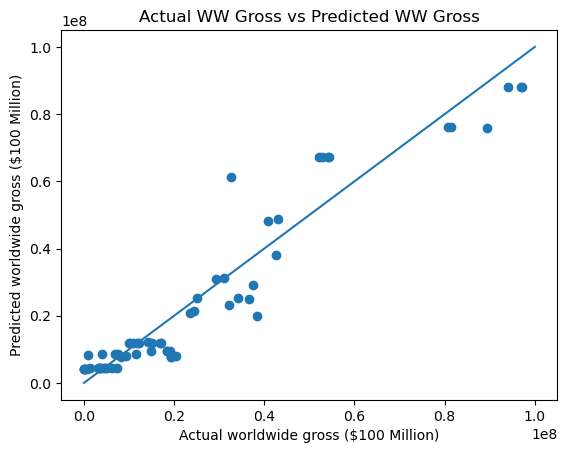

In [34]:
plt.scatter(y_test,pred_knn)
plt.plot(range(100_000_000), range(100_000_000))

plt.xlabel("Actual worldwide gross ($100 Million)")
plt.ylabel("Predicted worldwide gross ($100 Million)")
plt.title("Actual WW Gross vs Predicted WW Gross")

plt.show()

The Voting Ensemble is victorious with both the lowest MAE and RMSE.

## END OF A


# Putting the most efficient model into production

Now to get the most efficient model from each section and saving it using a pickle. This allows us to save time from training models over and over again.

In [35]:
import pickle
def find_efficient_model(criteria, target=1):
    if target == 1:
        if (
            "Gradient Boost"
            == models_a[models_a[criteria] == models_a[criteria].min()]["Model"].iloc[0]
        ):
            best_model = gb_best
        elif (
            "XGBoost"
            == models_a[models_a[criteria] == models_a[criteria].min()]["Model"].iloc[0]
        ):
            best_model = xgb_best

        elif (
            "AdaBoost"
            == models_a[models_a[criteria] == models_a[criteria].min()]["Model"].iloc[0]
        ):
            best_model = ada_best

        elif (
            "KNN"
            == models_a[models_a[criteria] == models_a[criteria].min()]["Model"].iloc[0]
        ):
            best_model = knn_a
        elif (
            "Voting Ensemble"
            == models_a[models_a[criteria] == models_a[criteria].min()]["Model"].iloc[0]
        ):
            best_model = vr_a
        elif (
            "Stack Ensemble"
            == models_a[models_a[criteria] == models_a[criteria].min()]["Model"].iloc[0]
        ):
            best_model = stk_a
        else:
            best_model = lm_a
    else:
        best_model = vr_a

    return best_model

best = find_efficient_model("MAE", 1)
print(best)

try:
    pickl = {"model": best}
except AttributeError:
    pickl = {"model": best.best_estimator_}

pickle.dump(pickl, open("FlaskAPI/models/" + "model_file_gross" + ".p", "wb"))

file_name = "FlaskAPI/models/model_file_gross.p"
with open(file_name, "rb") as pickled:
    data = pickle.load(pickled)
    model = data["model"]

GridSearchCV(cv=3, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'p': [1, 2, 3], 'weights': ['uniform', 'distance']})


In [36]:
list(X_test_final.iloc[1, :])

[6.9,
 57.0,
 63.0,
 1.0,
 2005.0,
 10500000.0,
 122093.02,
 86.0,
 3.0,
 30.0,
 2.0,
 1.0,
 6.0,
 407617.0,
 2.0,
 11.0,
 3.0,
 1.0,
 10.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 54206384.0,
 54206384.0,
 54206384.0,
 54206384.0,
 54206384.0,
 54206384.0,
 54206384.0,
 54206384.0]